In [82]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [83]:
df = pd.read_csv('../cosine_similarity.csv')

# remove rows that contains values that are larger than 2 or smaller than 2
outliers = df[(df['cos_sim_uint32'] > 2) | (df['cos_sim_uint32'] < 0)]
df = df[(df['cos_sim'] > 0) & (df['cos_sim'] < 1.1)]
df = df[(df['cos_sim_uint32'] > 0) & (df['cos_sim_uint32'] < 1.1)]
df = df[(df['cos_sim_uint16'] > 0) & (df['cos_sim_uint16'] < 1.1)]
df = df[(df['cos_sim_uint8'] > 0) & (df['cos_sim_uint8'] < 1.1)]

outliers.head()

,Unnamed: 0,cos_sim,cos_sim_uint32,cos_sim_uint16,cos_sim_uint8
25,25,1.002452,-4293.965612,-5.5513,0.509091
30,30,1.004961,-4293.964264,0.9940,0.818182
91,91,1.024975,-4293.941980,-5.5271,0.872727


Average difference between cos_sim and cos_sim_uint8:  0.07187540655402187


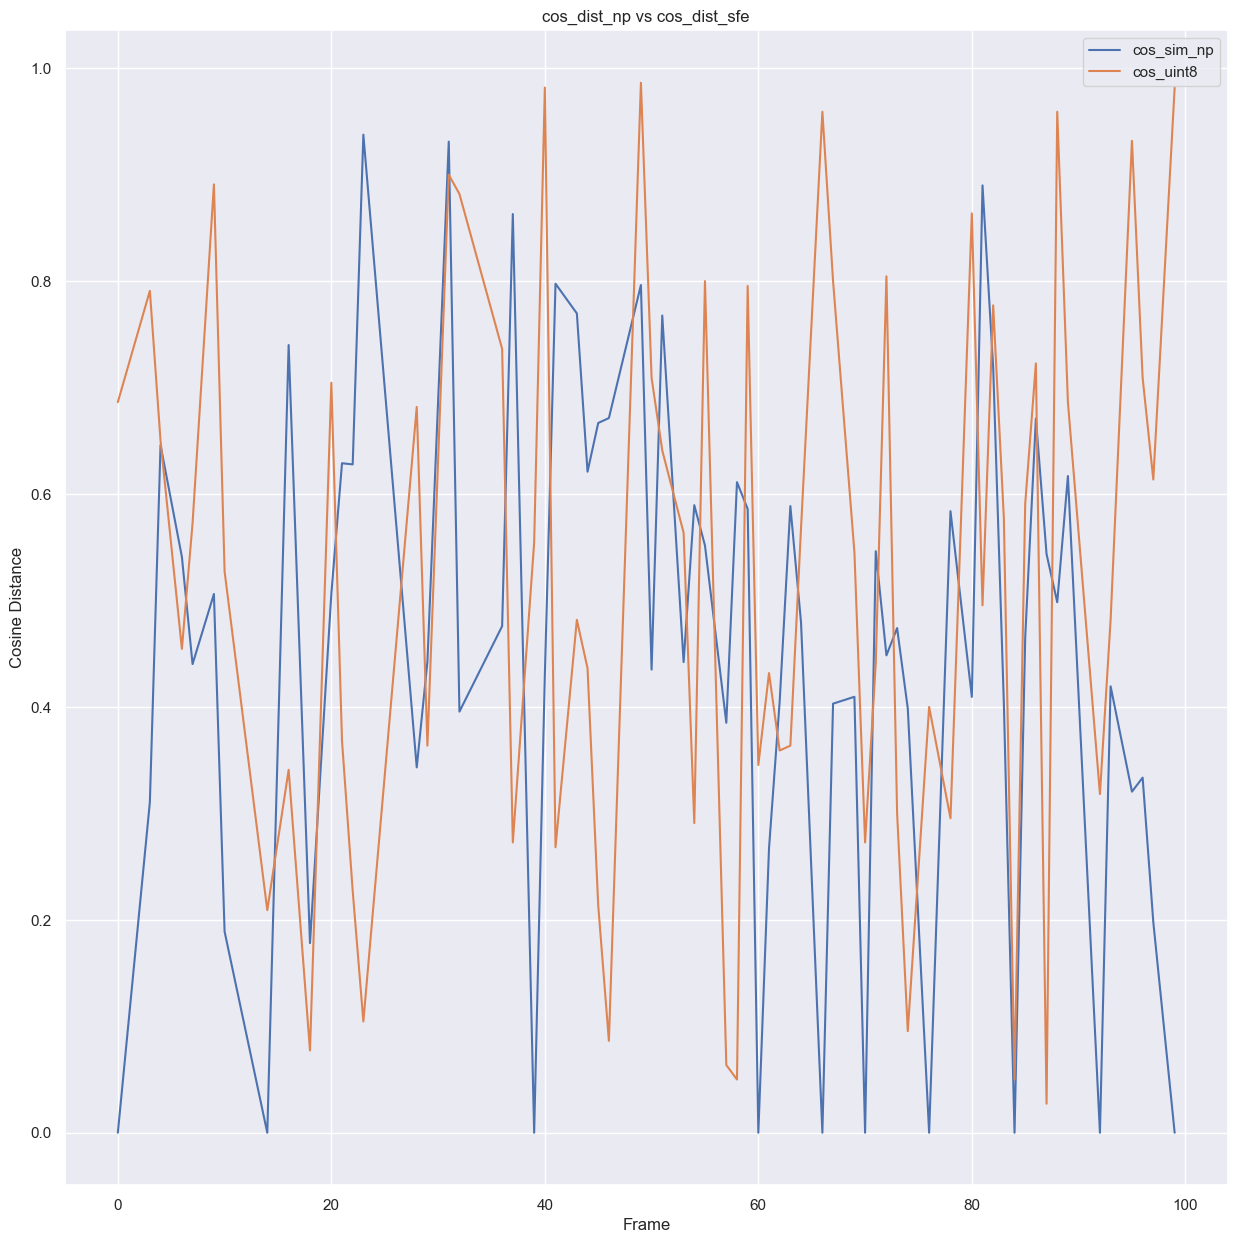

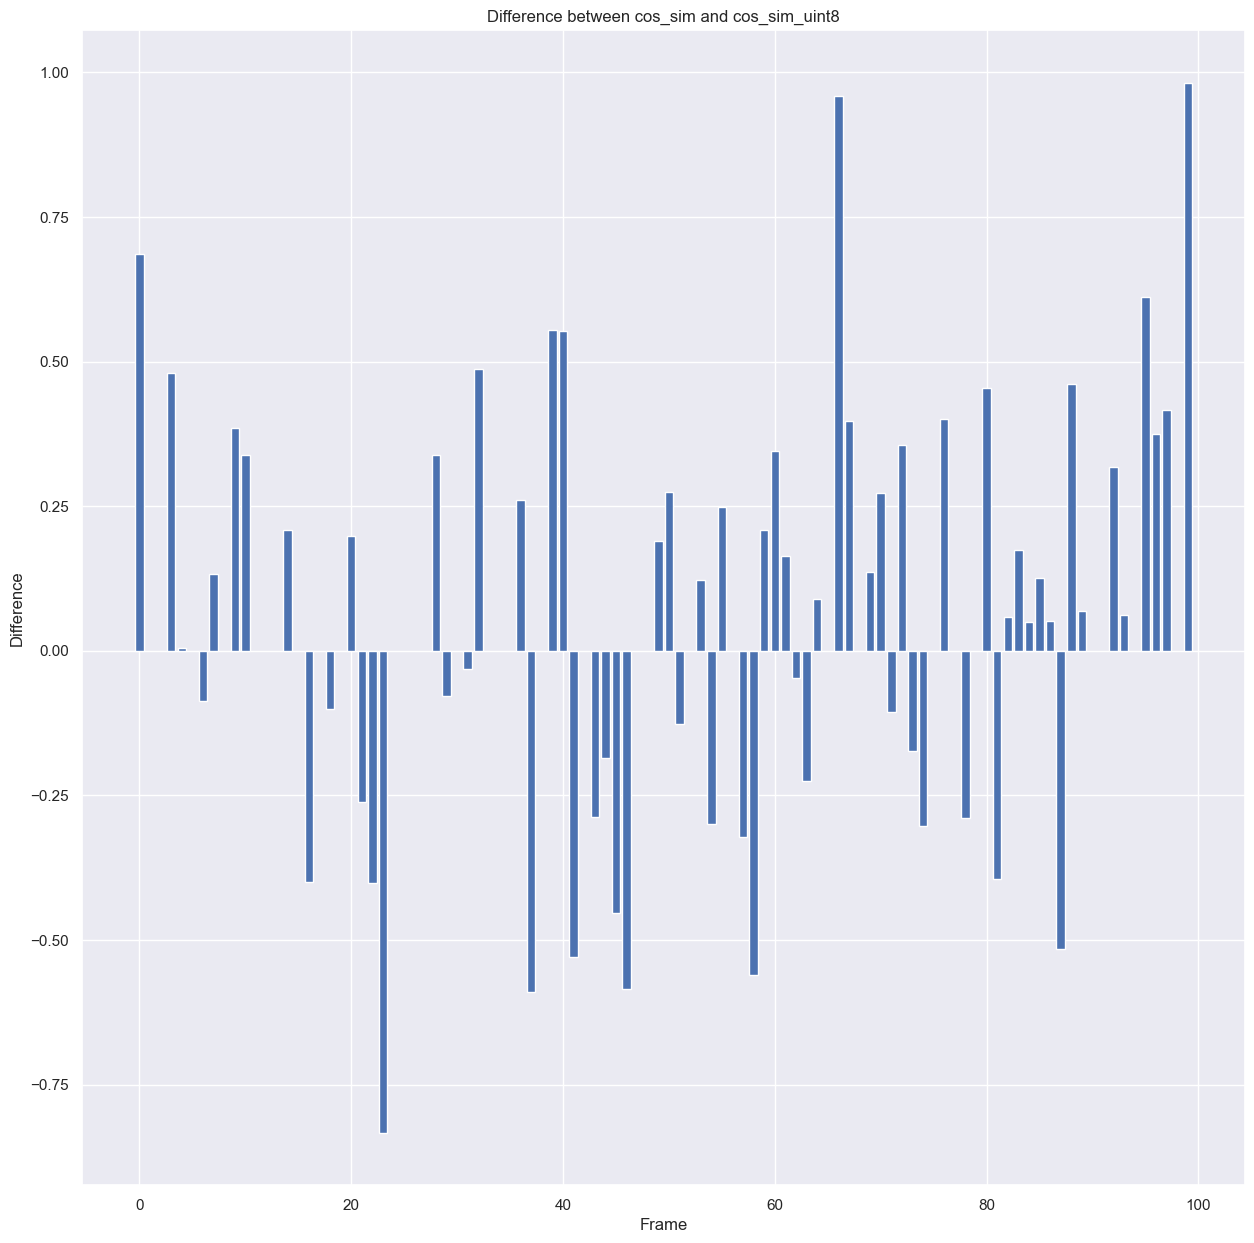

In [84]:
# output the average differnce between cos_sim and cos_sim_uint8
diff = df["cos_sim_uint8"] - df["cos_sim"]
print("Average difference between cos_sim and cos_sim_uint8: ", diff.mean())

plt.plot(df["cos_sim"], label="cos_sim_np")
#plt.plot(df["cos_sim_uint32"], label="cos_uint32")
#plt.plot(df["cos_sim_uint16"], label="cos_uint16")
plt.plot(df["cos_sim_uint8"], label="cos_uint8")
plt.xlabel("Frame")
plt.ylabel("Cosine Distance")
plt.legend()
plt.title("cos_dist_np vs cos_dist_sfe")

# plot diff as bars to see the difference between cos_sim and cos_sim_uint8
plt.figure()
plt.bar(df.index, diff)
plt.xlabel("Frame")
plt.ylabel("Difference")
plt.title("Difference between cos_sim and cos_sim_uint8")
plt.show()